In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
file = xr.open_dataset('zambia.nc')
file

<xarray.Dataset>
Dimensions:   (datetime: 3652, lon: 49, lat: 42)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 33.0 33.25 33.5 33.75
  * lat       (lat) float32 -7.75 -8.0 -8.25 -8.5 ... -17.25 -17.5 -17.75 -18.0
Data variables:
    crs       int32 ...
    precip    (datetime, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 12:52:01 2023: cdo mergetime PERSIANN_Zambia_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [6]:
ds= file.where(file !=-99.0)
ds

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 42, lon: 49)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 33.0 33.25 33.5 33.75
  * lat       (lat) float32 -7.75 -8.0 -8.25 -8.5 ... -17.25 -17.5 -17.75 -18.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 12:52:01 2023: cdo mergetime PERSIANN_Zambia_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [7]:
da=ds.precip.sel(lon=30 , lat=-15)
da1=da.sel(datetime=slice('2002','2011'))
da1

<xarray.DataArray 'precip' (datetime: 3652)>
array([ 0.  ,  0.  ,  0.  , ...,  8.82,  1.52, 25.48], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
    lon       float32 30.0
    lat       float32 -15.0
Attributes:
    grid_mapping:  crs

# QUESTION 1 

In [8]:
# Resample to monthly time steps and calculate monthly totals
monthly_totals = da1.resample(datetime='M').sum('datetime')
monthly_totals 

<xarray.DataArray 'precip' (datetime: 120)>
array([1.4628000e+02, 4.7410000e+01, 6.9959999e+01, 7.1129997e+01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.8600001e+00, 9.9499998e+00, 7.4799995e+01, 1.4068999e+02,
       2.1695000e+02, 2.6862000e+02, 3.4476001e+02, 2.0280001e+01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 5.0099998e+01, 4.8239998e+01, 2.4894998e+02,
       3.3335001e+02, 2.1969002e+02, 1.8988000e+02, 4.7639999e+01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.3740000e+01, 4.4840004e+01, 4.7350000e+02,
       3.5206000e+02, 8.4010002e+01, 1.2470000e+01, 0.0000000e+00,
       0.0000000e+00, 6.9999999e-01, 0.0000000e+00, 0.0000000e+00,
       2.3999999e-01, 0.0000000e+00, 1.3844000e+02, 3.5753003e+02,
       3.3694998e+02, 2.4661000e+02, 2.2935001e+02, 0.0000000e+00,
       6.3000000e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 5.5599999e+00, 1.3901999e+02, 3.4147998e+02,
       4.3306998e+02, 2.4519000e+02, 1.1832000e+02, 4.7199998e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.1250002e+01, 1.4683000e+02, 6.1090002e+02,
       3.6943002e+02, 3.3619999e+01, 7.2899994e+01, 1.0900000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.7000000e-01, 1.5248001e+02, 3.2098999e+02,
       3.8005002e+02, 1.6742999e+02, 1.6647000e+02, 1.2200000e+00,
       2.2000000e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 5.2999997e-01, 2.2655000e+02, 3.3725003e+02,
       2.2832001e+02, 2.9512000e+02, 1.1203000e+02, 3.0629999e+01,
       1.0599999e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 8.1869995e+01, 3.5926001e+02,
       3.8018002e+02, 1.1410000e+01, 1.2172000e+02, 1.2080001e+01,
       2.0999999e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.1200001e+00, 9.2050003e+01, 1.3225000e+02],
      dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-31 2002-02-28 ... 2011-12-31
    lon       float32 30.0
    lat       float32 -15.0

In [9]:
# Calculate monthly climatology (average of each month across all years)
monthly_mean = monthly_totals.groupby('datetime.month').mean('datetime')
monthly_mean

<xarray.DataArray 'precip' (month: 12)>
array([3.1766400e+02, 1.6191100e+02, 1.4378601e+02, 1.8879000e+01,
       2.1199998e-01, 7.0000000e-02, 0.0000000e+00, 0.0000000e+00,
       3.1000000e-01, 1.0472001e+01, 1.1451201e+02, 3.3228000e+02],
      dtype=float32)
Coordinates:
    lon      float32 30.0
    lat      float32 -15.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# QUESTION 2


# mean and plot for annual average

In [35]:
# Resample to annual time steps and calculate annual totals
annual_totals = da1.resample(datetime='y').sum('datetime') 
annual_totals

<xarray.DataArray 'precip' (datetime: 10)>
array([ 563.07996, 1197.9    , 1322.6401 ,  945.45   , 1299.6001 ,
       1580.28   ,  950.98   , 1279.72   , 1108.29   ,  753.02   ],
      dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-12-31 2003-12-31 ... 2011-12-31
    lon       float32 30.0
    lat       float32 -15.0

In [36]:
# Calculate the mean annual precipitation over the spatial dimensions (latitude and longitude)
annual_mean = annual_totals.groupby('datetime.year').mean('datetime')
annual_mean

<xarray.DataArray 'precip' (year: 10)>
array([ 563.07996, 1197.9    , 1322.6401 ,  945.45   , 1299.6001 ,
       1580.28   ,  950.98   , 1279.72   , 1108.29   ,  753.02   ],
      dtype=float32)
Coordinates:
    lon      float32 30.0
    lat      float32 -15.0
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011

Text(0.5, 0, 'NUMBER OF YEARS')

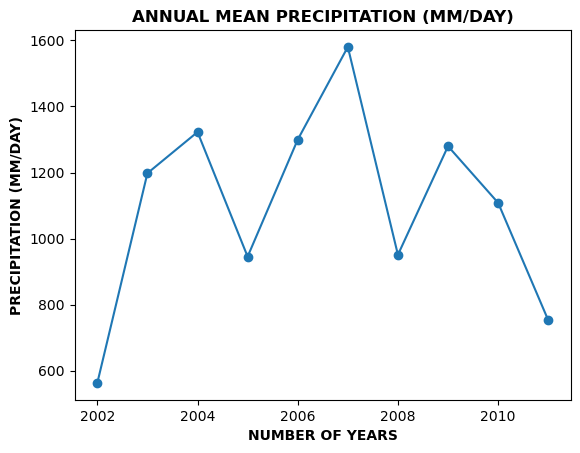

In [12]:
annual_mean.plot(marker='o')
plt.title("ANNUAL MEAN PRECIPITATION (MM/DAY)", fontweight='bold')
plt.ylabel("PRECIPITATION (MM/DAY)", fontweight='bold')
plt.xlabel("NUMBER OF YEARS", fontweight='bold')

In [13]:
da=ds.sel(lon=30 , lat=-15)
ds1=da.sel(datetime=slice('2002','2011'))
ds1

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
    lon       float32 30.0
    lat       float32 -15.0
Data variables:
    crs       float64 1.0
    precip    (datetime) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 8.82 1.52 25.48
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 12:52:01 2023: cdo mergetime PERSIANN_Zambia_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

# QUESTION 3

# NUMBER OF DRY AND WET DAYS

In [38]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
dry_days = ds1.where(ds1['precip'] < 1).precip
wet_days = ds1.where(ds1['precip'] >= 1).precip
wet_days

<xarray.DataArray 'precip' (datetime: 3652)>
array([  nan,   nan,   nan, ...,  8.82,  1.52, 25.48], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
    lon       float32 30.0
    lat       float32 -15.0
Attributes:
    grid_mapping:  crs

In [15]:
# Compute monthly and annual dry/wet days
monthly_dry_days = dry_days.resample(datetime='M').sum('datetime')
monthly_wet_days = wet_days.resample(datetime='M').sum('datetime')
annual_dry_days = dry_days.resample(datetime='Y').sum('datetime')
annual_wet_days = wet_days.resample(datetime='Y').sum('datetime')

# MONTHLY AND ANNUAL MEAN OF DRY AND WET DAYS

In [43]:
# Plot timeseries of monthly and annual dry/wet days
monthlydry_mean = dry_days.groupby('datetime.month').mean('datetime')
monthlywet_mean = wet_days.groupby('datetime.month').mean('datetime')

annualdry_mean = dry_days.groupby('datetime.year').mean('datetime')
annualwet_mean = wet_days.groupby('datetime.year').mean('datetime')
annualwet_mean

<xarray.DataArray 'precip' (year: 10)>
array([ 8.412272, 13.68184 , 15.482589, 14.434462, 15.544699, 16.39    ,
       11.8085  , 14.444659, 12.673793, 11.31303 ], dtype=float32)
Coordinates:
    lon      float32 30.0
    lat      float32 -15.0
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011

# TIMESERIES OF PLOTS

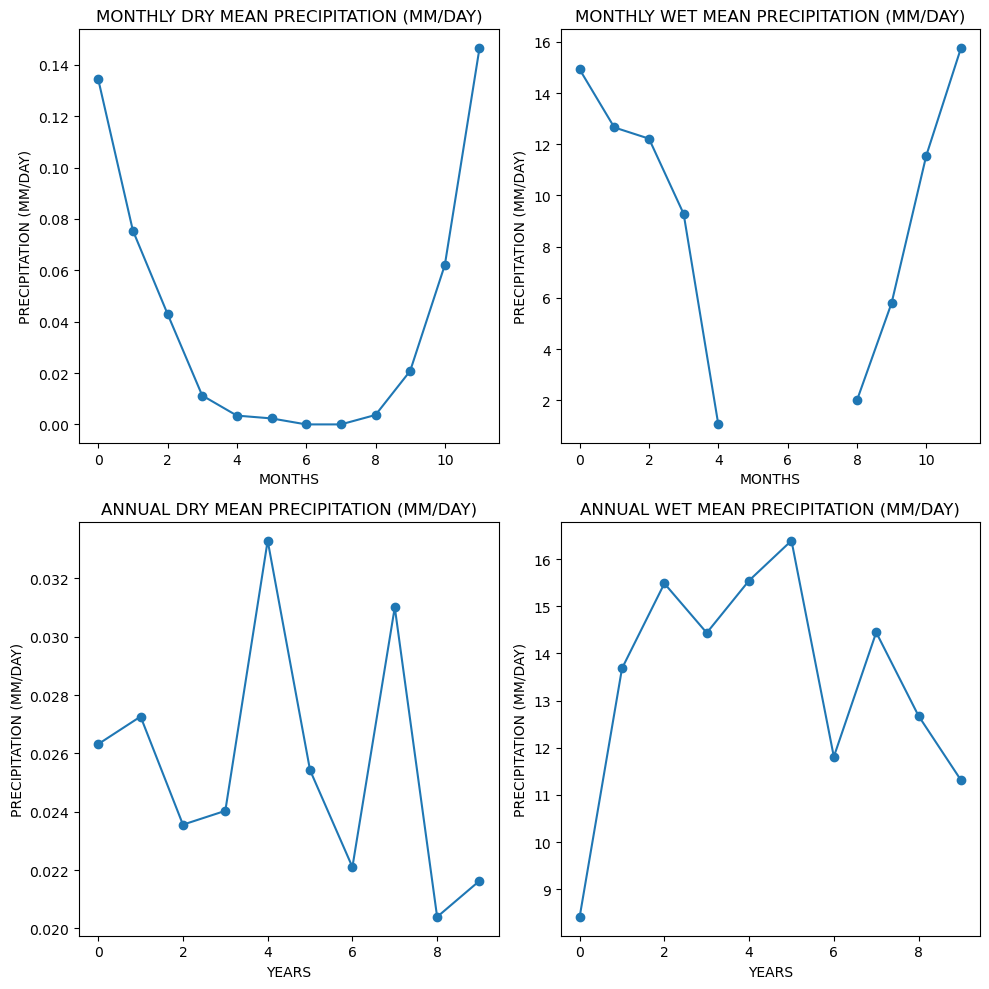

In [17]:
fig, axs = plt.subplots(2, 2, figsize= (10,10)) 
axs[0, 0].plot(monthlydry_mean, marker='o') 
axs[0, 0].set_title("MONTHLY DRY MEAN PRECIPITATION (MM/DAY)")
axs[0, 0].set_ylabel("PRECIPITATION (MM/DAY)")
axs[0, 0].set_xlabel("MONTHS")
axs[0, 1].plot(monthlywet_mean, marker='o') 
axs[0, 1].set_title("MONTHLY WET MEAN PRECIPITATION (MM/DAY)")
axs[0, 1].set_ylabel("PRECIPITATION (MM/DAY)")
axs[0, 1].set_xlabel("MONTHS")
axs[1, 0].plot(annualdry_mean, marker='o')
axs[1, 0].set_title("ANNUAL DRY MEAN PRECIPITATION (MM/DAY)")
axs[1, 0].set_ylabel("PRECIPITATION (MM/DAY)")
axs[1, 0].set_xlabel("YEARS")
axs[1, 1].plot(annualwet_mean, marker='o')
axs[1, 1].set_title("ANNUAL WET MEAN PRECIPITATION (MM/DAY)")
axs[1, 1].set_ylabel("PRECIPITATION (MM/DAY)")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout() 

# spatial plot

In [18]:
pd= file.where(file !=-99.0)
pd

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 42, lon: 49)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 33.0 33.25 33.5 33.75
  * lat       (lat) float32 -7.75 -8.0 -8.25 -8.5 ... -17.25 -17.5 -17.75 -18.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 12:52:01 2023: cdo mergetime PERSIANN_Zambia_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [19]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
dry_days = pd.where(pd['precip'] < 1).precip
wet_days = pd.where(pd['precip'] >= 1).precip
wet_days

<xarray.DataArray 'precip' (datetime: 3652, lat: 42, lon: 49)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 33.0 33.25 33.5 33.75
  * lat       (lat) float32 -7.75 -8.0 -8.25 -8.5 ... -17.25 -17.5 -17.75 -18.0
Attributes:
    grid_mapping:  crs

In [20]:
monthlydry_mean = dry_days.groupby('datetime.month').mean('datetime')
monthlywet_mean = wet_days.groupby('datetime.month').mean('datetime')

annualdry_mean = dry_days.groupby('datetime.year').mean('datetime')
annualwet_mean = wet_days.groupby('datetime.year').mean('datetime')

# SPATIAL PLOT FOR ANNUAL WET

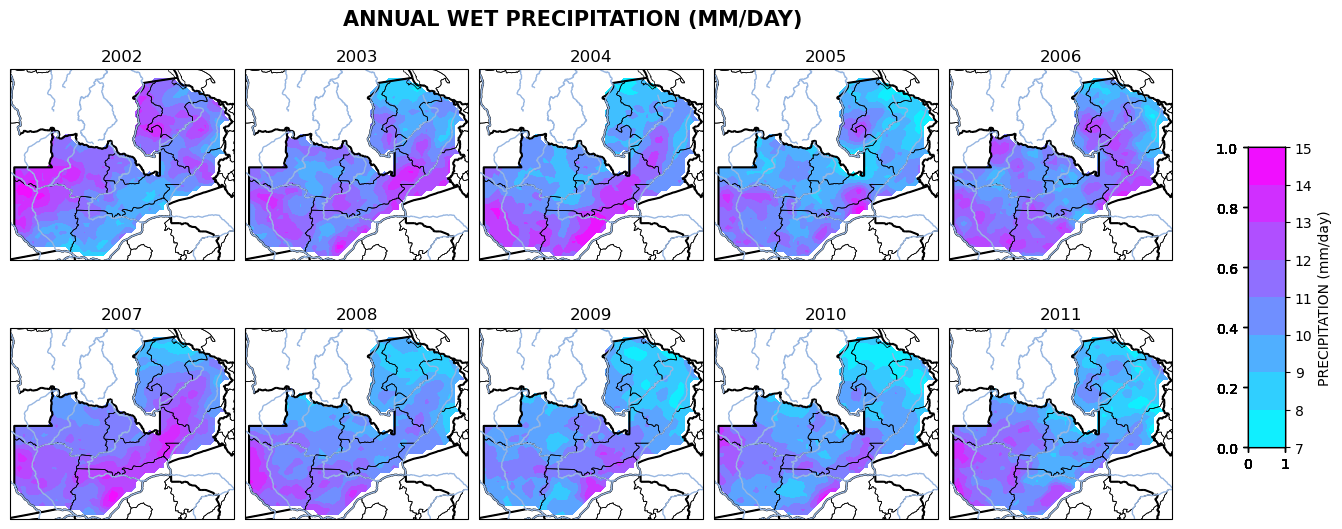

In [21]:
fig,ax=plt.subplots(2,5,figsize=(15,6),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_years=["2002","2003","2004","2005","2006","2007","2008","2009","2010","2011"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18])
    ax[i].set_title(names_of_years[i]),
    cb= ax[i].contourf(annualwet_mean.lon, annualwet_mean.lat, annualwet_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION (mm/day)')
fig.subplots_adjust(wspace=0.05,top=0.9)
plt.suptitle('ANNUAL WET PRECIPITATION (MM/DAY)', fontweight='bold', fontsize='15')

plt.show()
    

# SPATIAL PLOT FOR ANNUAL DRY

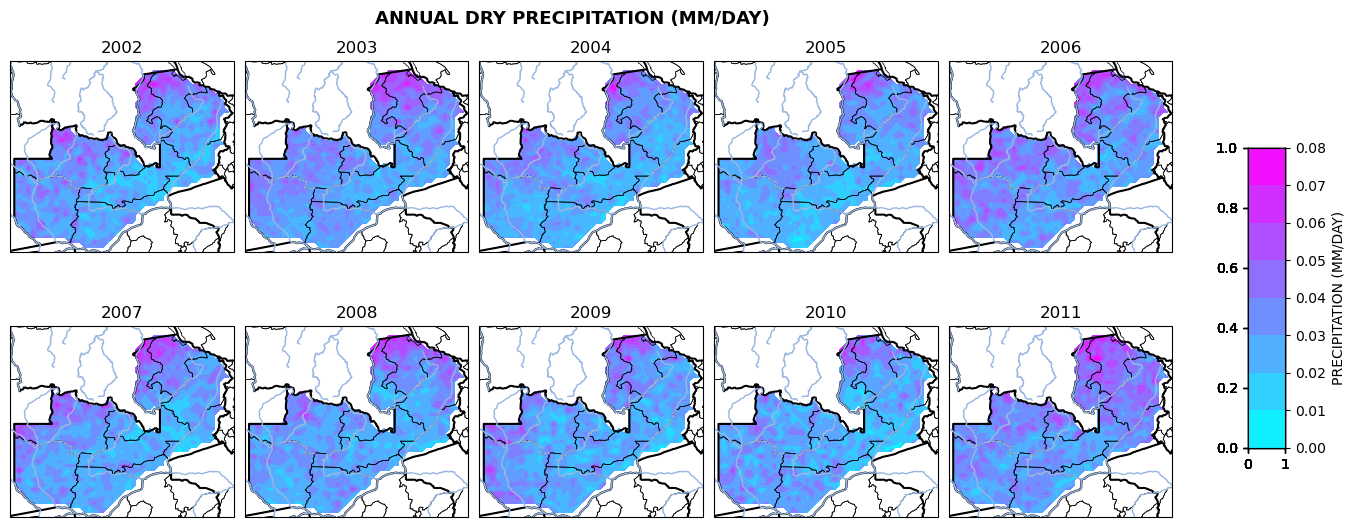

In [22]:
fig,ax=plt.subplots(2,5,figsize=(15,6),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_years=["2002","2003","2004","2005","2006","2007","2008","2009","2010","2011"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18])
    ax[i].set_title(names_of_years[i]),
    cb= ax[i].contourf(annualdry_mean.lon, annualdry_mean.lat, annualdry_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION (MM/DAY)')
fig.subplots_adjust(wspace=0.05,top=0.92)
plt.suptitle('ANNUAL DRY PRECIPITATION (MM/DAY)', fontweight='bold', fontsize='13')

plt.show()
    

# SPATIAL MONTHLY DRY

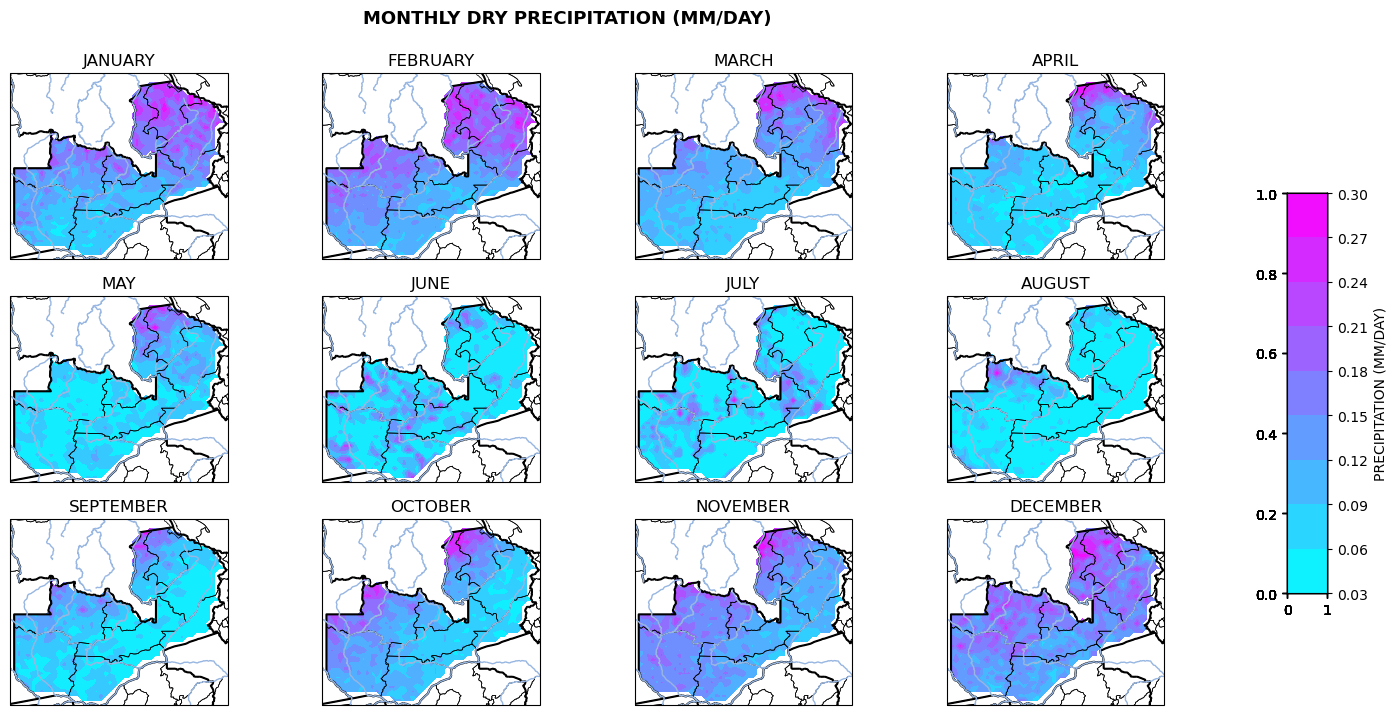

In [23]:
fig,ax=plt.subplots(3,4,figsize=(16,8),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(monthlydry_mean.lon, monthlydry_mean.lat, monthlydry_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION (MM/DAY)')
fig.subplots_adjust(wspace=0.03,top=0.9)
plt.suptitle('MONTHLY DRY PRECIPITATION (MM/DAY)', fontweight='bold', fontsize='13')

plt.show()
    

# SPATIAL PLOT FOR MONTHLY WET

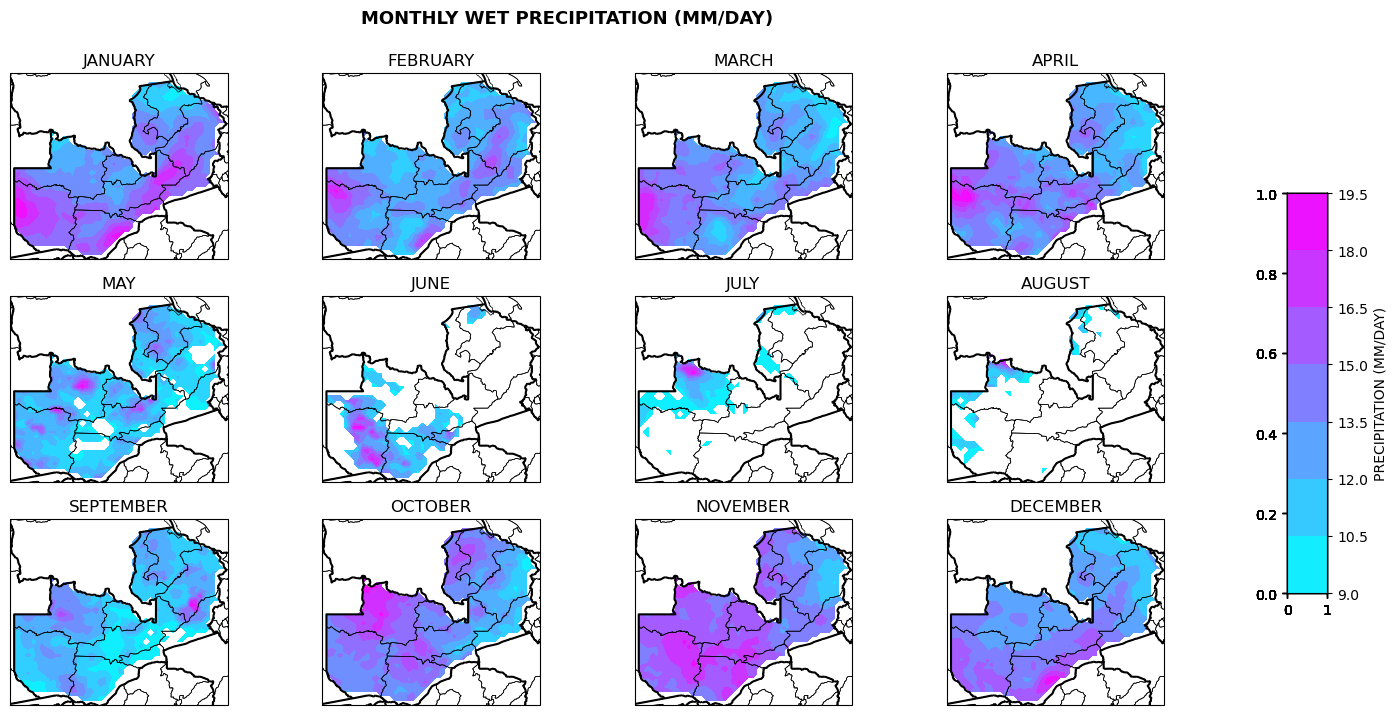

<Figure size 640x480 with 0 Axes>

In [24]:
fig,ax=plt.subplots(3,4,figsize=(16,8),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    #ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(monthlywet_mean.lon, monthlywet_mean.lat, monthlywet_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION (MM/DAY)')
fig.subplots_adjust(wspace=0.03,top=0.9)
plt.suptitle('MONTHLY WET PRECIPITATION (MM/DAY)', fontweight='bold', fontsize='13')

plt.show()
plt.savefig('done.png');

# NUMBER OF EXTREME DRY DAYS AND EXTREME WET DAYS

In [45]:
# Compute number of dry (RR<1mm) and wet (RR>=1mm) days
extremedry_days = ds1.where(ds1['precip'] >10).precip#count(dim='datetime')
extremewet_days = ds1.where(ds1['precip'] > 20).precip#count(dim='datetime')
extremewet_days

<xarray.DataArray 'precip' (datetime: 3652)>
array([  nan,   nan,   nan, ...,   nan,   nan, 25.48], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
    lon       float32 30.0
    lat       float32 -15.0
Attributes:
    grid_mapping:  crs

# AVERAGE MONTHLY AND ANNUAL FOR EXTREME DRY DAYS AND EXTREME WET DAYS

In [49]:
extreme_monthlydry_mean = extremedry_days.groupby('datetime.month').mean('datetime')
extreme_monthlywet_mean = extremewet_days.groupby('datetime.month').mean('datetime')

extreme_annualdry_mean = extremedry_days.groupby('datetime.year').mean('datetime')
extreme_annualwet_mean = extremewet_days.groupby('datetime.year').mean('datetime')
extreme_annualwet_mean

<xarray.DataArray 'precip' (year: 10)>
array([28.87    , 28.717085, 30.176666, 28.44619 , 32.650867, 39.41185 ,
       28.910667, 30.736816, 34.489445, 29.792725], dtype=float32)
Coordinates:
    lon      float32 30.0
    lat      float32 -15.0
  * year     (year) int64 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011

# TIMESERIES PLOT OF EXTREME MONTHLY AND ANNUAL DRY DAYS AND WET DAYS

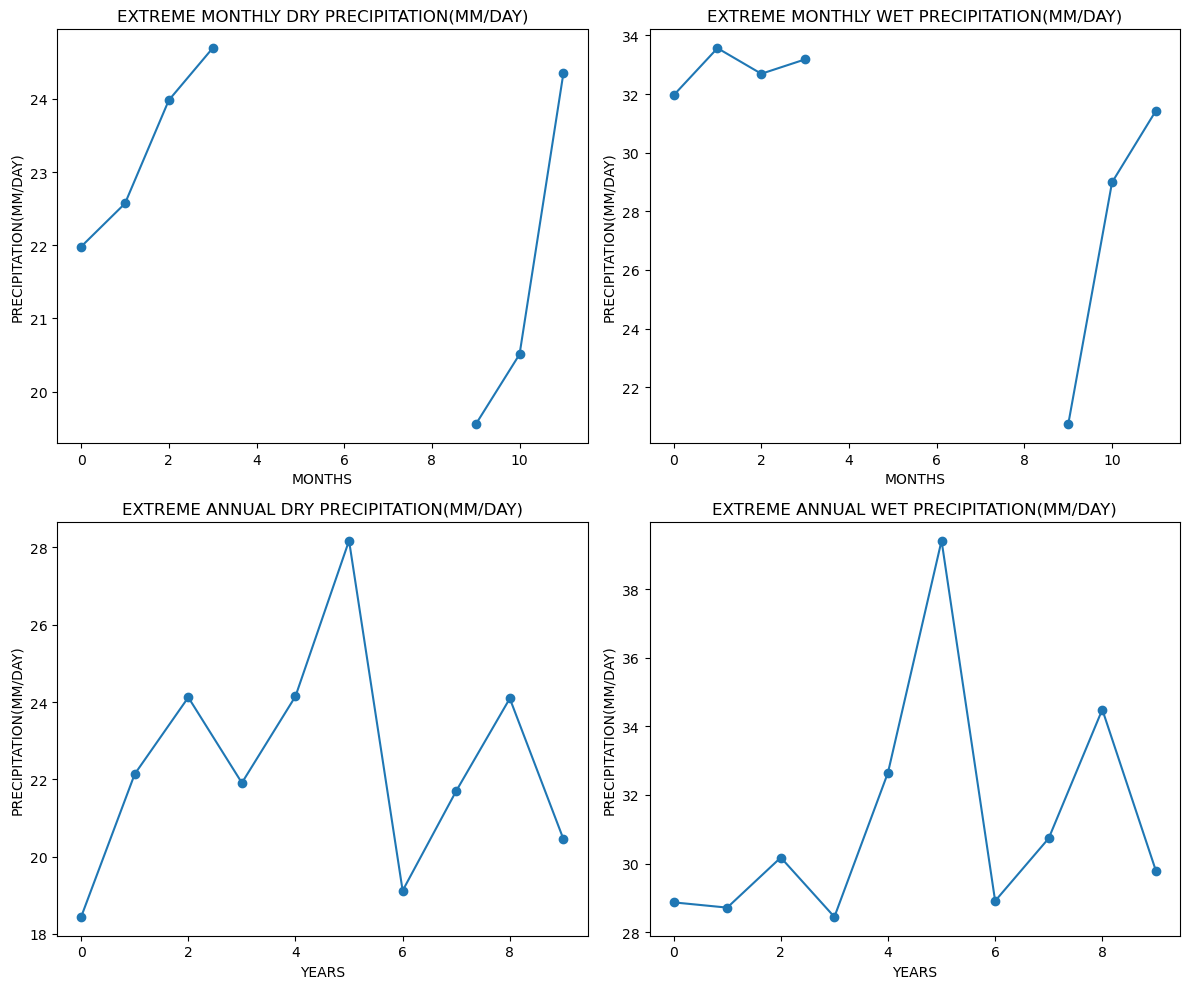

In [50]:
fig, axs = plt.subplots(2, 2, figsize= (12,10)) 
axs[0, 0].plot(extreme_monthlydry_mean, marker='o') 
axs[0, 0].set_title("EXTREME MONTHLY DRY PRECIPITATION(MM/DAY)")
axs[0, 0].set_ylabel("PRECIPITATION(MM/DAY)")
axs[0, 0].set_xlabel("MONTHS")
axs[0, 1].plot(extreme_monthlywet_mean, marker='o') 
axs[0, 1].set_title("EXTREME MONTHLY WET PRECIPITATION(MM/DAY)")
axs[0, 1].set_ylabel("PRECIPITATION(MM/DAY)")
axs[0, 1].set_xlabel("MONTHS")
axs[1, 0].plot(extreme_annualdry_mean, marker='o')
axs[1, 0].set_title("EXTREME ANNUAL DRY PRECIPITATION(MM/DAY)")
axs[1, 0].set_ylabel("PRECIPITATION(MM/DAY)")
axs[1, 0].set_xlabel("YEARS")
axs[1, 1].plot(extreme_annualwet_mean, marker='o')
axs[1, 1].set_title("EXTREME ANNUAL WET PRECIPITATION(MM/DAY)")
axs[1, 1].set_ylabel("PRECIPITATION(MM/DAY)")
axs[1, 1].set_xlabel("YEARS")
fig.tight_layout() 

# SPATIAL PLOTS

In [53]:
dw= file.where(file !=-99.0)
dw

<xarray.Dataset>
Dimensions:   (datetime: 3652, lat: 42, lon: 49)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 33.0 33.25 33.5 33.75
  * lat       (lat) float32 -7.75 -8.0 -8.25 -8.5 ... -17.25 -17.5 -17.75 -18.0
Data variables:
    crs       float64 1.0
    precip    (datetime, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Fri Apr 28 12:52:01 2023: cdo mergetime PERSIANN_Zambia_202...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [54]:
extremedry_days = dw.where(dw['precip'] > 10).precip#count(dim='datetime')
extremewet_days = dw.where(dw['precip'] > 20).precip#count(dim='datetime')
extremewet_days

<xarray.DataArray 'precip' (datetime: 3652, lat: 42, lon: 49)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * datetime  (datetime) datetime64[ns] 2002-01-01 2002-01-02 ... 2011-12-31
  * lon       (lon) float32 21.75 22.0 22.25 22.5 ... 33.0 33.25 33.5 33.75
  * lat       (lat) float32 -7.75 -8.0 -8.25 -8.5 ... -17.25 -17.5 -17.75 -18.0
Attributes:
    grid_mapping:  crs

In [55]:
extreme_monthlydry_mean = extremedry_days.groupby('datetime.month').mean('datetime')
extreme_monthlywet_mean = extremewet_days.groupby('datetime.month').mean('datetime')

extreme_annualdry_mean = extremedry_days.groupby('datetime.year').mean('datetime')
extreme_annualwet_mean = extremewet_days.groupby('datetime.year').mean('datetime')

# SPATIAL PLOTS FOR EXTREME MONTHLY DRY DAYS

C:\Users\hp\anaconda3\lib\site-packages\matplotlib\contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hp\anaconda3\lib\site-packages\matplotlib\contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


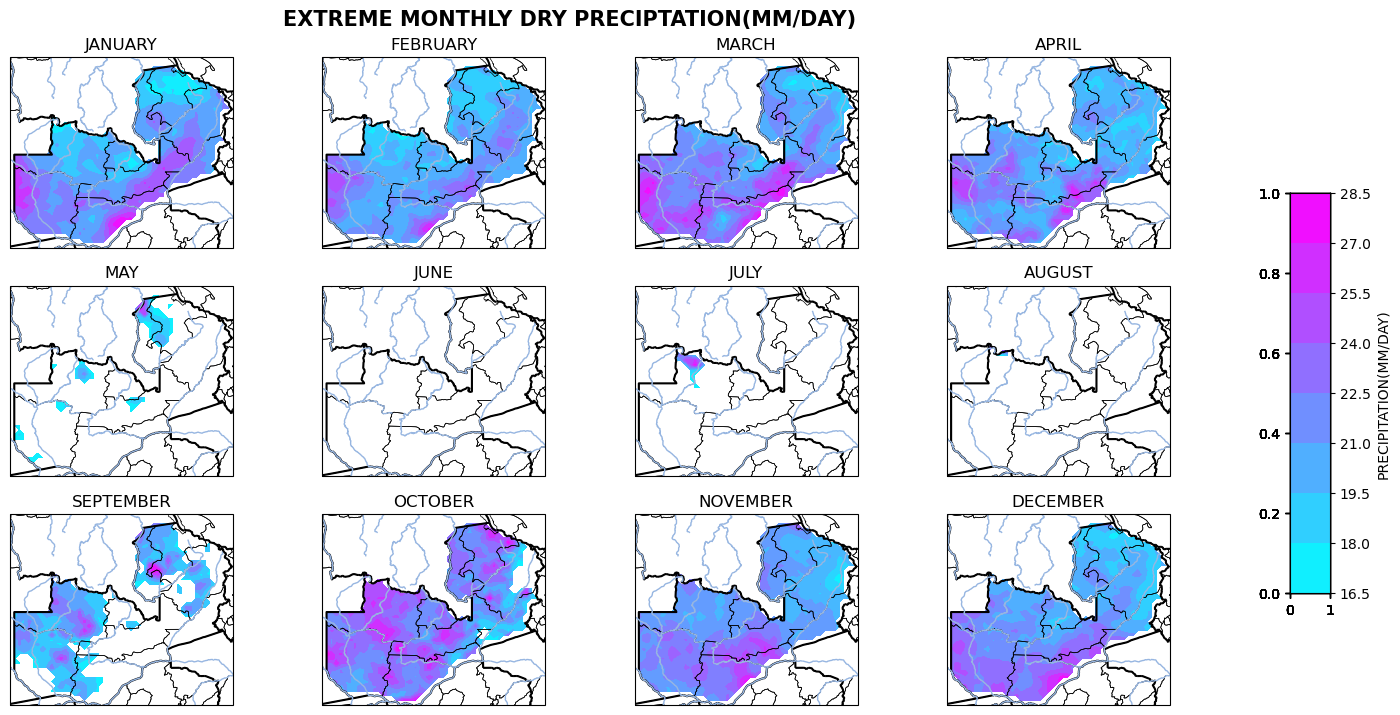

In [56]:
fig,ax=plt.subplots(3,4,figsize=(16,8),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_monthlydry_mean.lon, extreme_monthlydry_mean.lat, extreme_monthlydry_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION(MM/DAY)')
fig.subplots_adjust(wspace=0.03,top=0.92)
plt.suptitle('EXTREME MONTHLY DRY PRECIPTATION(MM/DAY)', fontweight='bold', fontsize='15')

plt.show()

# SPATIAL PLOT FOR EXTREME MONTHLY WET DAYS

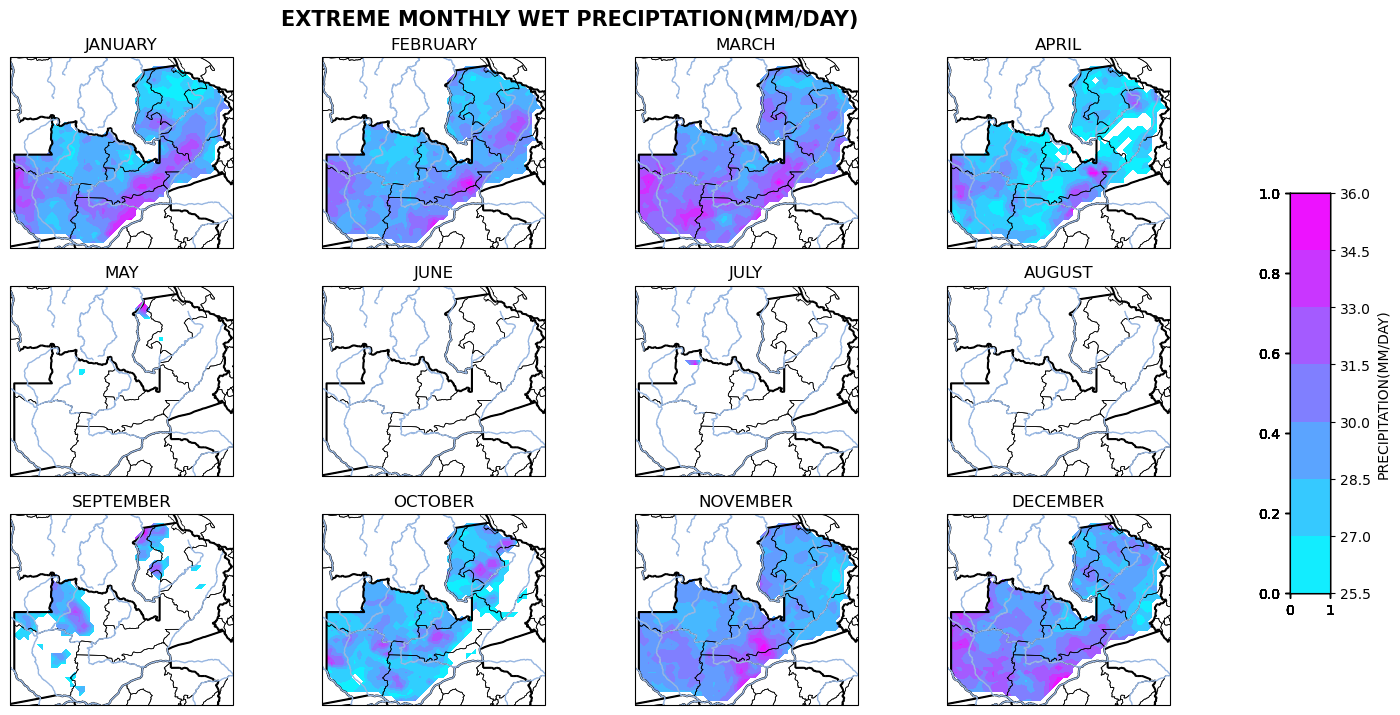

In [57]:
fig,ax=plt.subplots(3,4,figsize=(16,8),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_months=["JANUARY","FEBRUARY","MARCH","APRIL","MAY","JUNE","JULY","AUGUST","SEPTEMBER","OCTOBER","NOVEMBER","DECEMBER"]
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18])
    ax[i].set_title(names_of_months[i]),
    cb= ax[i].contourf(extreme_monthlywet_mean.lon, extreme_monthlywet_mean.lat, extreme_monthlywet_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION(MM/DAY)')
fig.subplots_adjust(wspace=0.03,top=0.92)
plt.suptitle('EXTREME MONTHLY WET PRECIPTATION(MM/DAY)', fontweight='bold', fontsize='15')

plt.show()

# SPATIAL PLOT FOR EXTREME ANNUAL DRY

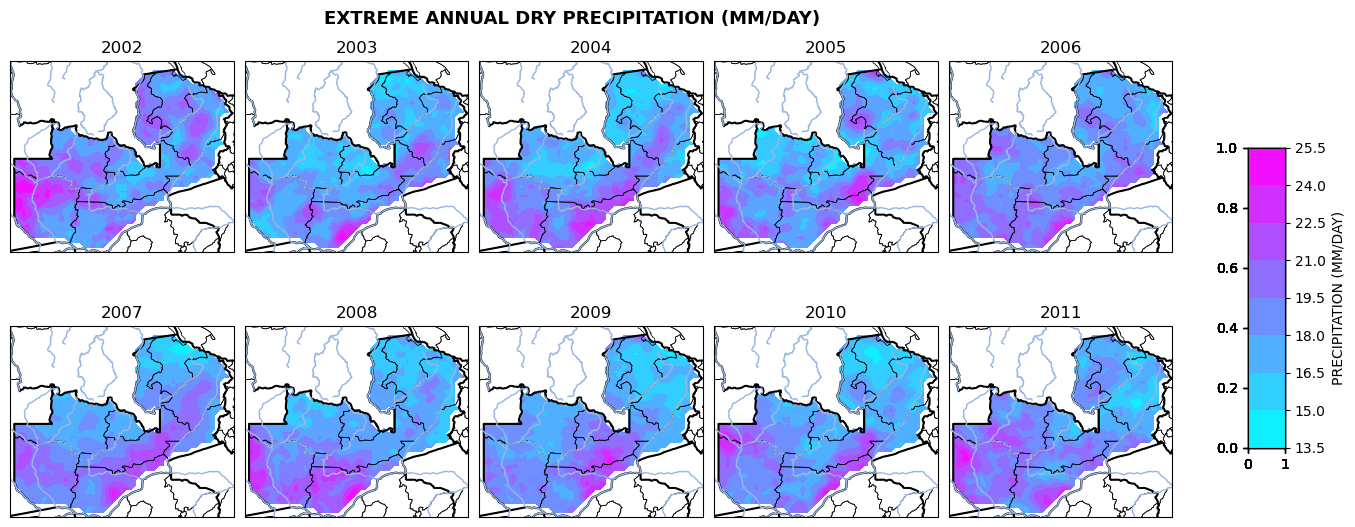

In [58]:
fig,ax=plt.subplots(2,5,figsize=(15,6),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_years=["2002","2003","2004","2005","2006","2007","2008","2009","2010","2011"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18])
    ax[i].set_title(names_of_years[i]),
    cb= ax[i].contourf(extreme_annualdry_mean.lon, extreme_annualdry_mean.lat, extreme_annualdry_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION (MM/DAY)')
fig.subplots_adjust(wspace=0.05,top=0.92)
plt.suptitle('EXTREME ANNUAL DRY PRECIPITATION (MM/DAY)', fontweight='bold', fontsize='13')

plt.show()

# SPATIAL PLOT FOR EXTREME ANNUAL WET DAYS

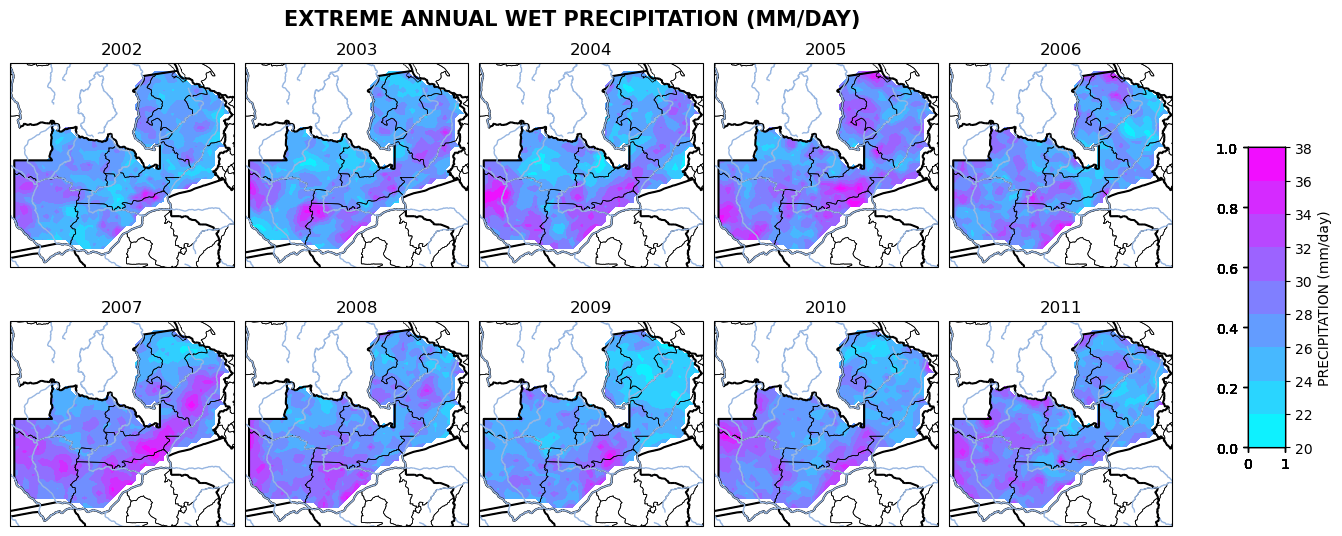

In [59]:
fig,ax=plt.subplots(2,5,figsize=(15,6),
                   subplot_kw={'projection':ccrs.PlateCarree()},squeeze=True)
ax=ax.flatten()
names_of_years=["2002","2003","2004","2005","2006","2007","2008","2009","2010","2011"]
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE,linewidth=0.2)
    ax[i].add_feature(cfeature.BORDERS,linewidth=1.5)
    ax[i].add_feature(cfeature.STATES,linewidth=0.5)
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([21.75,33.75,-7.75,-18.75])
    ax[i].set_title(names_of_years[i]),
    cb= ax[i].contourf(extreme_annualwet_mean.lon, extreme_annualwet_mean.lat, extreme_annualwet_mean[i],
                       cmap='cool', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.95,0.25,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION (mm/day)')
fig.subplots_adjust(wspace=0.05,top=0.9)
plt.suptitle('EXTREME ANNUAL WET PRECIPITATION (MM/DAY)', fontweight='bold', fontsize='15')

plt.show()
    